**Customer churn prediction is to measure why customers are leaving a business. In this project I've built customer churn deep learning model for telecom business along with precision,recall, f1-score to measure performance of our model**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install -q keras

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
df= pd.read_csv('/content/drive/MyDrive/DL/churn.csv')
df.sample(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4932,5566-SOEZD,Male,0,Yes,Yes,27,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,One year,Yes,Credit card (automatic),80.65,2209.75,No


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.drop('customerID', axis=1, inplace= True)

In [7]:
pd.to_numeric(df.TotalCharges)

ValueError: ignored

**Somevalues seems to be not numbers but blank string.**

In [8]:
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df[df.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


**As these are blank values, I've dropped them.**

In [10]:
df1= df[df.TotalCharges != ' ']
df1.TotalCharges= pd.to_numeric(df1.TotalCharges)


In [11]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df1.shape

(7032, 20)

In [13]:
# Custom function to print unique categorical col values.
def cat_val(data):
  for col in data:
    if data[col].dtypes=='object':
      print(f'{col} : {data[col].unique()}')

In [14]:
cat_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Convert gender col values to 1 and 0

In [15]:
df1['gender'].replace({'Female':1,'Male':0}, inplace= True)

In [16]:
cat_val(df1)

Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']



**Some of the columns have no internet service or no phone service, that can be replaced with a simple No**

In [17]:
df1.replace({'No phone service': 'No'}, inplace= True)
df1.replace({'No internet service': 'No'}, inplace= True)

In [18]:
cat_val(df1)

Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


**Categorical columns**

In [19]:
df1.shape[1]

20

In [20]:
cols= ['InternetService','Contract','PaymentMethod']
df2= pd.get_dummies(data= df1, columns= cols)
df2.shape[1]

27

In [21]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
df2.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6932,0,0,No,No,10,Yes,No,No,No,No,No,No,Yes,Yes,56.75,503.25,No,1,0,0,1,0,0,1,0,0,0


**Converted Yes and No values to 1 and 0 respectively**

In [23]:
yes_no_columns= ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
  df2[col].replace({'Yes':1, 'No':0}, inplace= True)

In [24]:
df2.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2677,1,0,0,0,4,1,0,0,0,0,0,0,0,1,70.05,266.9,1,0,1,0,1,0,0,0,1,0,0


**Let's scale the values**

In [25]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
df2[cols_to_scale]= sc.fit_transform(df2[cols_to_scale])

In [26]:
df2.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5527,1,1,1,0,1.0,1,1,0,1,1,0,1,1,0,0.863184,0.872288,0,0,1,0,0,1,0,0,1,0,0


**Train test split**

In [27]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [29]:
X_train.shape

(5625, 26)

In [30]:
X_test.shape

(1407, 26)

In [31]:
y_train.shape

(5625,)

**Build a model (ANN) in Keras**

In [32]:
from keras.layers import Dense
from keras.models import Sequential

In [33]:
model= Sequential()

In [34]:
model.add(Dense(units= 10, kernel_initializer= 'he_uniform', activation='relu', input_shape=(26,)))
model.add(Dense(units= 8, kernel_initializer= 'he_uniform', activation='relu'))
model.add(Dense(units= 1, kernel_initializer= 'glorot_uniform', activation='sigmoid'))

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 367
Trainable params: 367
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss= 'binary_crossentropy',
             metrics= ['accuracy'],
             optimizer= 'adam'
             )

In [39]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, validation_split=0.35, batch_size = 10, epochs = 100)

Epoch 1/100
366/366 [==============================] - 2s 4ms/step - loss: 0.3909 - accuracy: 0.8203 - val_loss: 0.4247 - val_accuracy: 0.8014
Epoch 2/100
366/366 [==============================] - 1s 4ms/step - loss: 0.3893 - accuracy: 0.8225 - val_loss: 0.4248 - val_accuracy: 0.8045
Epoch 3/100
366/366 [==============================] - 2s 4ms/step - loss: 0.3909 - accuracy: 0.8211 - val_loss: 0.4256 - val_accuracy: 0.8029
Epoch 4/100
366/366 [==============================] - 1s 4ms/step - loss: 0.3903 - accuracy: 0.8197 - val_loss: 0.4258 - val_accuracy: 0.8065
Epoch 5/100
366/366 [==============================] - 2s 4ms/step - loss: 0.3894 - accuracy: 0.8200 - val_loss: 0.4260 - val_accuracy: 0.8040
Epoch 6/100
366/366 [==============================] - 2s 4ms/step - loss: 0.3892 - accuracy: 0.8197 - val_loss: 0.4272 - val_accuracy: 0.8045
Epoch 7/100
366/366 [==============================] - 2s 4ms/step - loss: 0.3888 - accuracy: 0.8184 - val_loss: 0.4264 - val_accuracy: 0.8029

loss: 0.4223 - accuracy: 0.8015 - val_loss: 0.4235 - val_accuracy: 0.8035

In [40]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4692 - accuracy: 0.7747


[0.4691774547100067, 0.7746979594230652]

In [41]:
prediction= model.predict(X_test)

In [42]:
prediction[:5]

array([[0.10286087],
       [0.22850558],
       [0.00265062],
       [0.7623968 ],
       [0.4463014 ]], dtype=float32)

In [44]:
y_pred= list()
for i in prediction:
  if i >=0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [45]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [46]:

# Making the Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

In [47]:
cm

array([[880, 119],
       [198, 210]])

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.64      0.51      0.57       408

    accuracy                           0.77      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.76      0.77      0.77      1407



Text(69.0, 0.5, 'Truth')

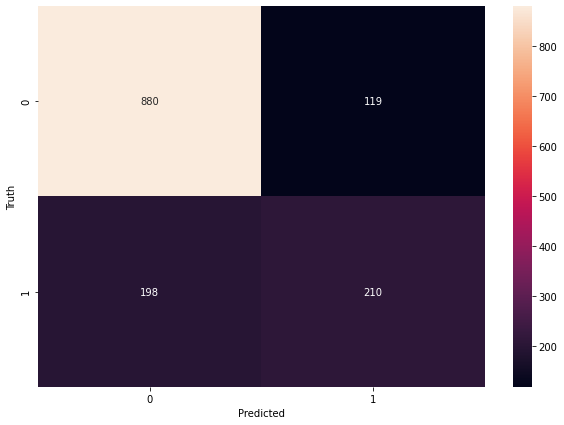

In [51]:
import seaborn as sns

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,  fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')